In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Important functions

In [128]:
# Function for normalizing data
def NormalizeData(input_data):
    mu = input_data.mean(axis = 0)
    std = input_data.std(axis = 0)
    return (input_data - mu) / std, mu, std

# Defining class for Multinomial Logistic Regression
class MultinomialLogisticRegression(nn.Module):
    def __init__(self, inputDim, outputDim):
        super().__init__()
        self.MultinomialLogReg = nn.Sequential(
            nn.Linear(inputDim, outputDim),
            nn.Softmax(dim = 1)
        )
        
    def forward(self, x):
        return self.MultinomialLogReg(x)
    
# Function for training the model
def TrainModel(x_train, y_train, no_epochs, learning_rate, numClass):
    inputDim = x_train.shape[1]
    
    # Defining the model
    model = MultinomialLogisticRegression(inputDim, numClass)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    
    # Training the model
    loss_prev = 2000
    loss_all = []
    for epoch in range(no_epochs):
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(np.abs(loss_prev - loss.item()) < 1e-15):
            break
            
        loss_prev = loss.item()
        loss_all.append(loss.item())
        
    print('\nLoss on training set: ' + str(loss.item()))
    
    plt.plot(loss_all)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    return model, loss.item()

# Function for accuracy calculation 
def CalculateAccuracy(y_pred, y_target):
    return np.mean(y_pred == y_target) * 100

# Loading and preparing data

In [58]:
# Import data
data = pd.read_csv('dataset_32_pendigits.csv')

# Print first 5 examples
data.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [138]:
# Prepare data
x = torch.tensor(data.drop('class', axis = 1).values).float()
y = torch.tensor(data['class'].values)

num_class = len(np.unique(y.data.numpy()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 15)

# Normalize data
x_train, mu, std = NormalizeData(x_train)
x_test = (x_test - mu) / std

# Multinomial Logistic Regression using PyTorch


Loss on training set: 1.51838219165802


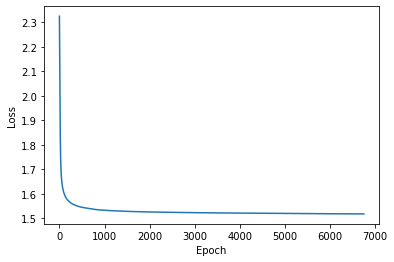

In [141]:
# Train the model
no_epochs = 10000
learning_rate = 0.02

model, loss = TrainModel(x_train, y_train, no_epochs, learning_rate, num_class)

In [142]:
# Results
y_pred_train = model(x_train)
y_pred_train_np = y_pred_train.argmax(axis = 1).data.numpy()
accuracy_train = CalculateAccuracy(y_pred_train_np, y_train.data.numpy())
print('Accuracy on train set: ' + str(accuracy_train) + '%')

y_pred_test = model(x_test)
y_pred_test_np = y_pred_test.argmax(axis = 1).data.numpy()
accuracy_test = CalculateAccuracy(y_pred_test_np, y_test.data.numpy())
print('Accuracy on test set: ' + str(accuracy_test) + '%')


Accuracy on train set: 94.50060655074807%
Accuracy on test set: 93.45454545454545%


# Multinomial Logistic Regression using sklearn

In [151]:
multinomLogReg_sklearn = LogisticRegression(penalty = 'none', multi_class = 'multinomial', max_iter = 10000, tol = 1e-15)
multinomLogReg_sklearn.fit(x_train, y_train.data.numpy().ravel())

# Training data
y_pred_sklearn_train = multinomLogReg_sklearn.predict(x_train)
accuracy_train = CalculateAccuracy(y_pred_sklearn_train, y_train.data.numpy())
print('Accuracy on train set: ' + str(accuracy_train) + '%')

# Test data
y_pred_sklearn_test = multinomLogReg_sklearn.predict(x_test)
accuracy_test = CalculateAccuracy(y_pred_sklearn_test, y_test.data.numpy())
print('Accuracy on test set: ' + str(accuracy_test) + '%')

Accuracy on train set: 96.05742013748484%
Accuracy on test set: 95.36363636363636%
